In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**LOAD DATASET**

In [4]:
import pandas as pd

# Path to the dataset in Google Drive
file_path = '/content/drive/MyDrive/churn_data/Telco-Customer-Churn.csv'


# Load the dataset
dataset = pd.read_csv(file_path)


**CHECKING FOR NULL VALUES**

In [16]:
# Check for missing values
print(dataset.isnull().sum())

# Separate numeric and categorical columns
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = dataset.select_dtypes(include=['object']).columns



gender                 0
seniorcitizen          0
partner                0
dependents             0
tenure                 0
                      ..
totalcharges_997.75    0
totalcharges_998.1     0
totalcharges_999.45    0
totalcharges_999.8     0
totalcharges_999.9     0
Length: 13602, dtype: int64


**PREPROCESSING - LABELENCODER , ONEHOTENCODER**

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# For binary categorical columns (if any)
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in dataset.select_dtypes(include=['object']).columns:
    if dataset[col].nunique() == 2:  # Binary categorical columns
        dataset[col] = label_encoder.fit_transform(dataset[col])
    else:  # Use One-Hot Encoding for multi-class categorical columns
        dataset = pd.get_dummies(dataset, columns=[col], drop_first=True)

**STANDARD SCALAR**

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numeric columns
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])


In [22]:
# Your preprocessed dataset is ready
print(dataset.head())

     gender  seniorcitizen   partner  dependents    tenure  phoneservice  \
0 -1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1  0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2  0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3  0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4 -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   

   paperlessbilling  monthlycharges     churn  multiplelines_No phone service  \
0          0.829798       -1.160323 -0.601023                            True   
1         -1.205113       -0.259629 -0.601023                           False   
2          0.829798       -0.362660  1.663829                           False   
3         -1.205113       -0.746535 -0.601023                            True   
4          0.829798        0.197365  1.663829                           False   

   ...  totalcharges_995.35  totalcharges_996.45  totalc

In [23]:
# Check data types to confirm encoding and scaling
print(dataset.dtypes)


gender                 float64
seniorcitizen          float64
partner                float64
dependents             float64
tenure                 float64
                        ...   
totalcharges_997.75       bool
totalcharges_998.1        bool
totalcharges_999.45       bool
totalcharges_999.8        bool
totalcharges_999.9        bool
Length: 6560, dtype: object


In [15]:
# Verify one-hot encoding (by looking at column names)
print(dataset.columns)

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'paperlessbilling', 'monthlycharges', 'churn',
       'customerid_0003-MKNFE',
       ...
       'totalcharges_995.35', 'totalcharges_996.45', 'totalcharges_996.85',
       'totalcharges_996.95', 'totalcharges_997.65', 'totalcharges_997.75',
       'totalcharges_998.1', 'totalcharges_999.45', 'totalcharges_999.8',
       'totalcharges_999.9'],
      dtype='object', length=13602)


In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_churn_data(dataset):
    # Separate numeric and categorical columns
    numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = dataset.select_dtypes(include=['object', 'bool']).columns

    # 1. Encoding Categorical Variables
    label_encoder = LabelEncoder()

    for col in categorical_cols:
        if dataset[col].nunique() == 2:  # Binary columns
            dataset[col] = label_encoder.fit_transform(dataset[col])
        else:
            dataset = pd.get_dummies(dataset, columns=[col], drop_first=True)

    # 2. Scaling Numeric Features
    scaler = StandardScaler()
    dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

    return dataset

# Example usage for any dataset
# dataset = pd.read_csv('your_dataset.csv')
preprocessed_dataset = preprocess_churn_data(dataset)
print(preprocessed_dataset.head())


     gender  seniorcitizen   partner  dependents    tenure  phoneservice  \
0 -1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1  0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2  0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3  0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4 -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   

   paperlessbilling  monthlycharges     churn  multiplelines_No phone service  \
0          0.829798       -1.160323 -0.601023                               1   
1         -1.205113       -0.259629 -0.601023                               0   
2          0.829798       -0.362660  1.663829                               0   
3         -1.205113       -0.746535 -0.601023                               1   
4          0.829798        0.197365  1.663829                               0   

   ...  totalcharges_995.35  totalcharges_996.45  totalc

**EXPLORATORY DATA ANALYSIS**

In [25]:
print("Shape of the dataset:", dataset.shape)

Shape of the dataset: (7043, 6560)


In [26]:
print("\nSummary Statistics:\n", dataset.describe(include='all'))


Summary Statistics:
              gender  seniorcitizen       partner    dependents        tenure  \
count  7.043000e+03   7.043000e+03  7.043000e+03  7.043000e+03  7.043000e+03   
mean  -2.219500e-17   7.062046e-18  4.060677e-17  4.640773e-17 -2.118614e-17   
std    1.000071e+00   1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00   
min   -1.009559e+00  -4.399165e-01 -9.666223e-01 -6.540119e-01 -1.318165e+00   
25%   -1.009559e+00  -4.399165e-01 -9.666223e-01 -6.540119e-01 -9.516817e-01   
50%    9.905318e-01  -4.399165e-01 -9.666223e-01 -6.540119e-01 -1.372744e-01   
75%    9.905318e-01  -4.399165e-01  1.034530e+00  1.529024e+00  9.214551e-01   
max    9.905318e-01   2.273159e+00  1.034530e+00  1.529024e+00  1.613701e+00   

       phoneservice  paperlessbilling  monthlycharges         churn  \
count  7.043000e+03      7.043000e+03    7.043000e+03  7.043000e+03   
mean   1.210636e-17     -2.068171e-17   -1.664625e-17 -8.070910e-18   
std    1.000071e+00      1.000071e+00    1.0

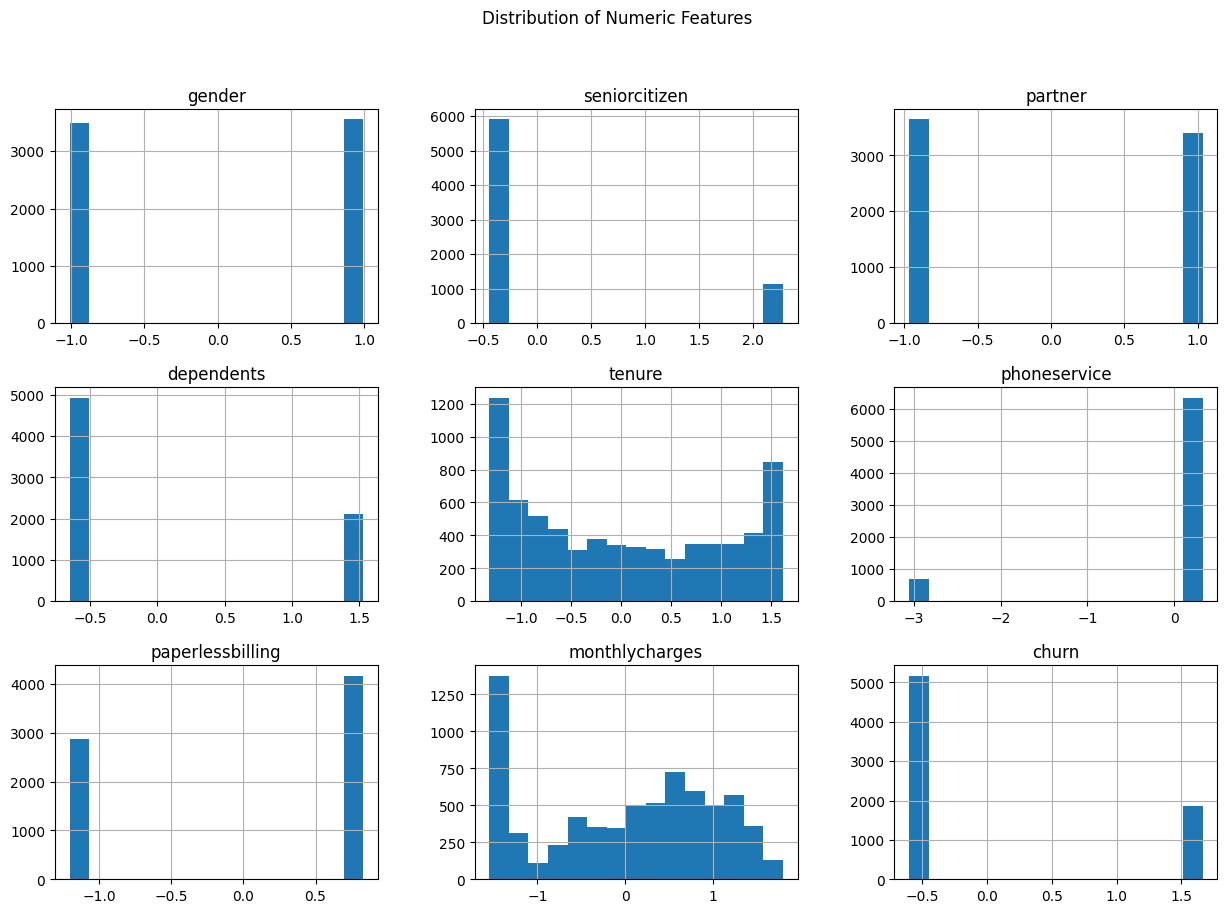

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Data Distribution
# Numeric features distribution

dataset[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numeric Features')
plt.show()

In [32]:
# Categorical features distribution
if not categorical_cols.empty:
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=dataset, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()
else:
    print("No categorical columns available for plotting.")

No categorical columns available for plotting.


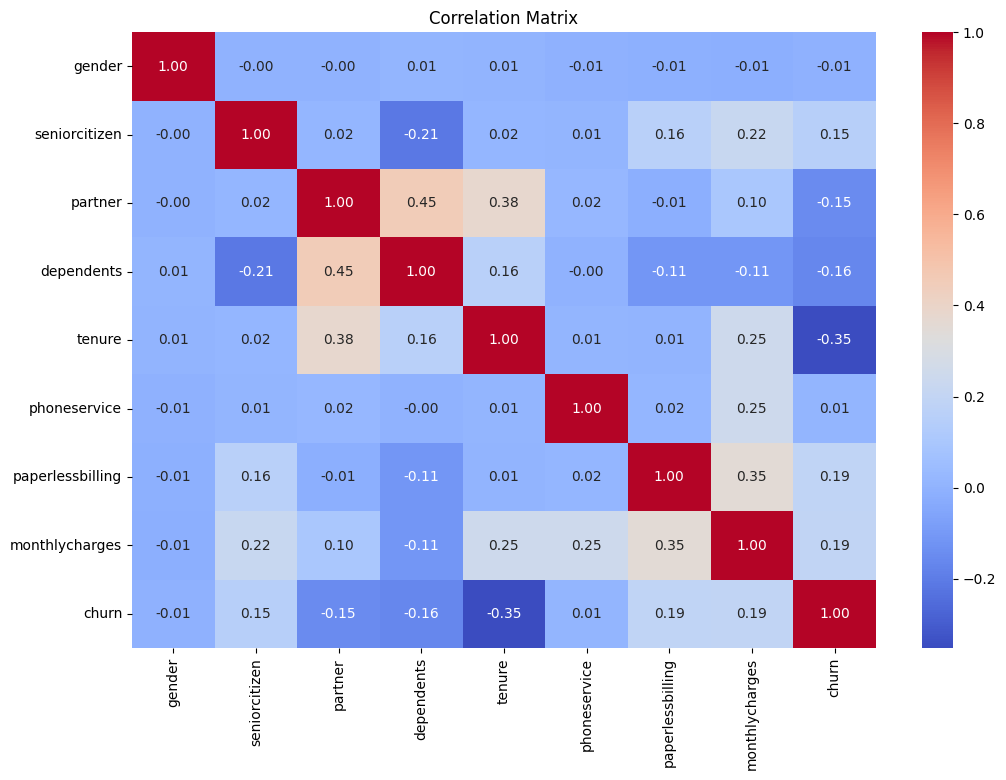

In [30]:
# Step 6: Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = dataset[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


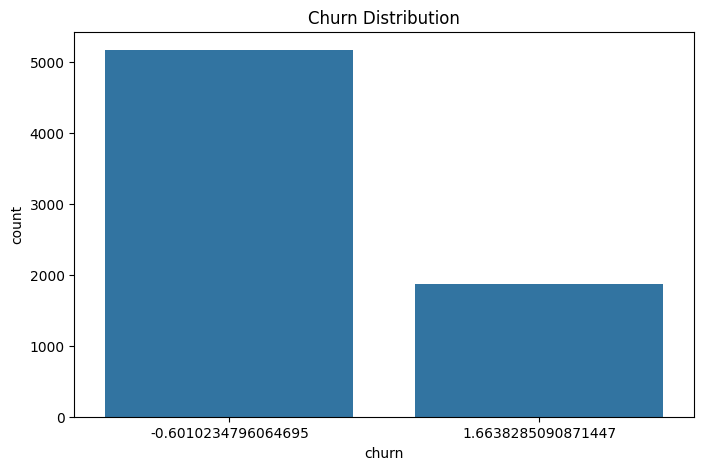

In [31]:
# Step 7: Churn Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset, x='churn')  # Assuming 'churn' is the target variable
plt.title('Churn Distribution')
plt.xticks(rotation=0)
plt.show()

**GENERALIZED PREPROCESSING FOR ALL DATASETS**

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset (example)
# dataset = pd.read_csv('your_dataset.csv')

# Assume 'feature_engineering' function is defined and called
def feature_engineering(dataset):
    # Perform your feature engineering steps
    return dataset  # Return the processed dataset

# Preprocess the dataset
engineered_dataset = feature_engineering(dataset)

# Step 1: Convert target variable to categorical
if 'churn' in engineered_dataset.columns:
    # Ensure churn is binary (0 and 1)
    engineered_dataset['churn'] = engineered_dataset['churn'].astype(int)

# Step 2: Split the data
X = engineered_dataset.drop(columns=['churn'])
y = engineered_dataset['churn']

# Step 3: Check for missing values
if X.isnull().sum().any():
    print("Missing values found. Please handle them.")

# Step 4: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Step 5: Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

# Step 6: Preprocess the features
X_processed = preprocessor.fit_transform(X)

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Now you can proceed to model training
print("Preprocessing completed. Proceeding to model training.")


Preprocessing completed. Proceeding to model training.


**MODEL SELECTION AND TRAINING - EVALUATION METRICS**

Unique values in target variable: [0 1]
Model: Logistic Regression
Accuracy: 0.8239886444286728
Confusion Matrix:
 [[939  97]
 [151 222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

ROC AUC Score: 0.860842123241587


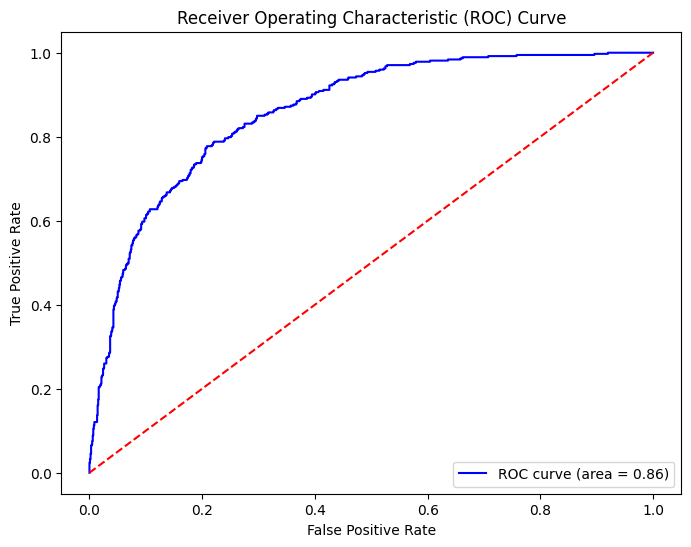

Model: Random Forest
Accuracy: 0.7920511000709723
Confusion Matrix:
 [[950  86]
 [207 166]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC Score: 0.8451289761611478


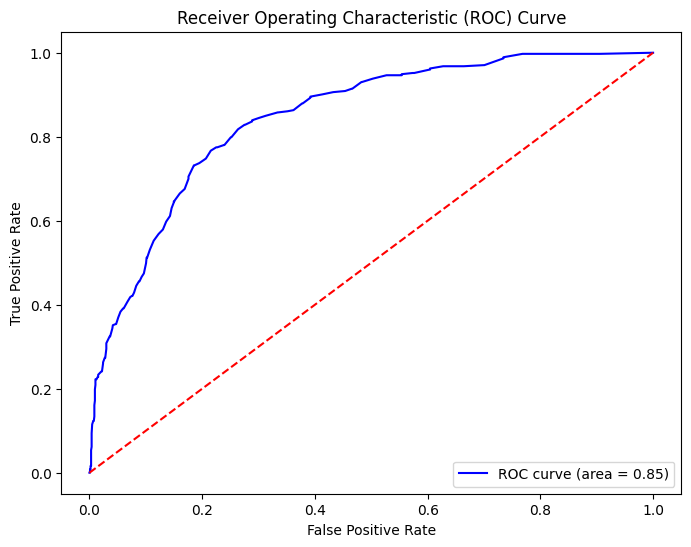

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:41:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.78708303761533
Confusion Matrix:
 [[916 120]
 [180 193]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.52      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC Score: 0.8393413520759365


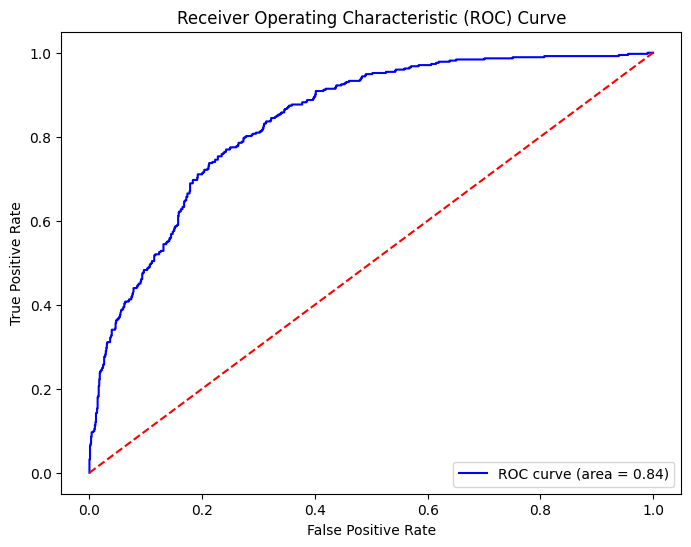

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# Assume 'engineered_dataset' is your preprocessed dataset
# and 'churn' is the target variable
X = preprocessed_dataset.drop(columns=['churn'])
y = preprocessed_dataset['churn']

# Check the unique values in the target variable
print("Unique values in target variable:", y.unique())

# If it's continuous and you want to convert it to binary, define a threshold
# Example: Convert continuous churn scores to binary labels
threshold = 0.5  # Define an appropriate threshold
y_binary = (y > threshold).astype(int)  # Convert to binary (0 and 1)

# Step 1: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Select Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Step 3: Train Models & Evaluate Performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    # Assuming y_pred contains the predicted classes and y_test is your true labels
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

    # Evaluate the model
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print("ROC AUC Score:", roc_auc)
    print("="*50)

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# from sklearn.model_selection import RandomizedSearchCV

# # Example parameter grid with fewer options
# param_distributions = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
# }

# # Randomized Search with a smaller number of iterations
# random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions, n_iter=10, cv=2, n_jobs=-1, random_state=42)
# random_search.fit(X_train, y_train)

# print("Best Parameters from Randomized Search:", random_search.best_params_)



**Explainability with MLI Techniques**

**Global Explanations
Partial Dependence Plots (PDP)**

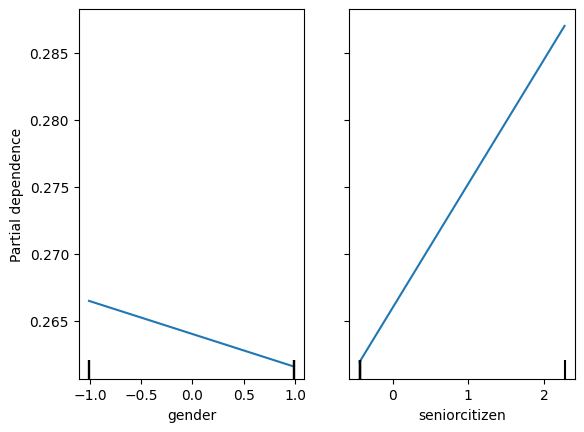

In [47]:
from sklearn.inspection import PartialDependenceDisplay

# Assuming 'model' is your trained model and 'X' is your feature data
features = [0, 1]  # Indices of the features to plot

# Create the plot
PartialDependenceDisplay.from_estimator(model, X, features)
plt.show()


**Global SHAP (SHapley Additive exPlanations)**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.2 MB/s eta 0:00:00


 99%|===================| 6981/7043 [01:02<00:00]       

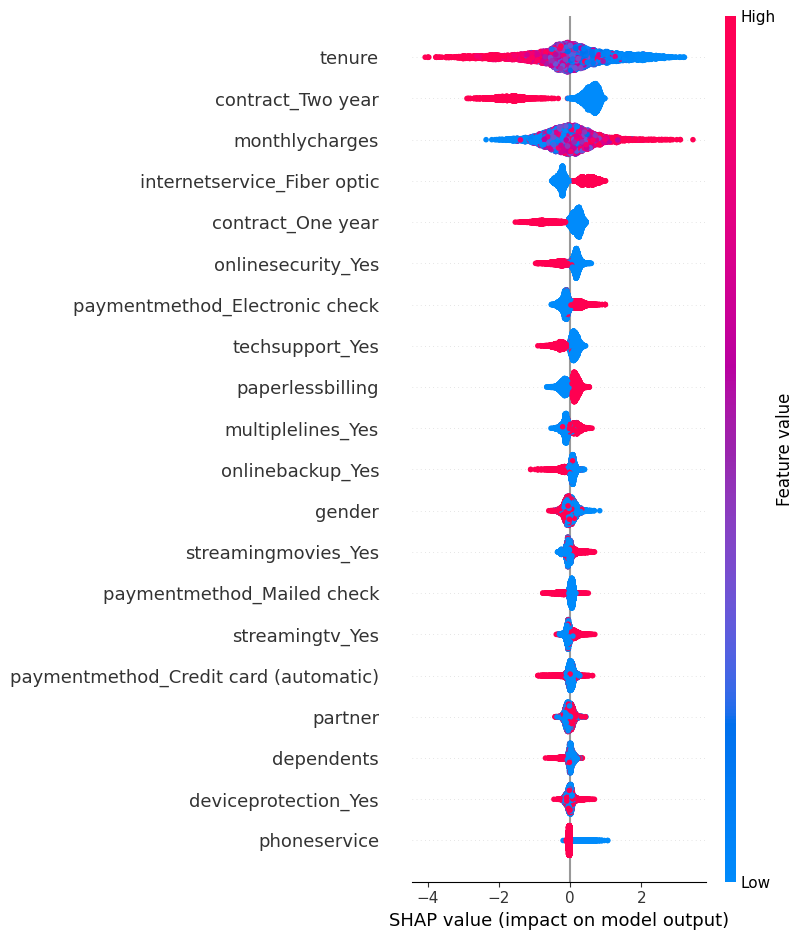

In [49]:
!pip install shap
import shap

# Create object that can calculate shap values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plot SHAP summary
shap.summary_plot(shap_values, X)


In [56]:
import pandas as pd

# Assuming you have a trained model called 'model'
# Sample input as a dictionary
sample_input = {
    'gender': 'Female',
    'seniorcitizen': 0,
    'partner': 'Yes',
    'dependents': 'No',
    'tenure': 5,
    'phoneservice': 'Yes',
    'paperlessbilling': 'Yes',
    'monthlycharges': 70.65,
    'totalcharges': 353.65
    # Include any other relevant features as needed
}

# Create a DataFrame from the sample input
sample_df = pd.DataFrame([sample_input])

# Preprocess the sample input just like you did for the training data
# For example, if you have to encode categorical variables
sample_df_encoded = pd.get_dummies(sample_df, drop_first=True)

# Ensure that the columns match the training data
sample_df_encoded = sample_df_encoded.reindex(columns=model.feature_names_in_, fill_value=0)

# Make prediction
prediction = model.predict(sample_df_encoded)
prediction_proba = model.predict_proba(sample_df_encoded)

# Output the results
print(f"Predicted class: {prediction[0]}")
print(f"Predicted probabilities: {prediction_proba[0]}")


Predicted class: 0
Predicted probabilities: [0.96983904 0.03016096]
